# Крейсманн Кирилл, 9383

# Лабораторная работа №1: Изучение возможностей библиотек Python для решения задач цифровой обработки сигналов

## Вариант №7

In [164]:
import librosa
import wave
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import math
import numpy as np
from scipy import signal


## 1.Загрузка аудиосигнала и построение огибающей



In [165]:
audio = './var_7.wav'
x, sr = librosa.load(audio,sr=44100)#получаем звуковой временной ряд
N=len(x)

Аудио:

In [166]:
ipd.Audio(x,rate=sr)

График сигнала:

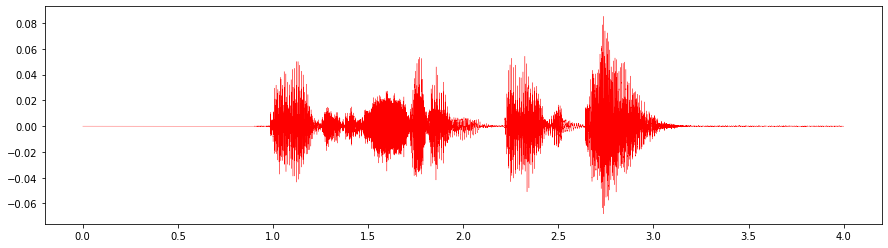

In [167]:
xcoords1=np.linspace(0,4,len(x))
plt.figure(figsize=(15,4))
plt.plot(xcoords1, x,
        linestyle = '-',
        linewidth = 0.3,
        color = 'red')
plt.show()

### Строим огибающую. 
Для сигнала $x(i), i = 0,1,...,N-1$ строим огибающую $y(j), j = 0,1,...,n-1$. 
Пусть $m = \lbrack\frac{N}{n}\rbrack$ - число точек в интервале усреднения. Тогда $$y(j) = \frac{1}{m} \displaystyle\sum_{k=mj}^{mj+m-1} |x(k)|$$.

In [168]:
#строим огибающую
n = 200
m = int(N/n)
y=[]

for i in range(n):
    y.append(0)
    for k in range(m*i,m*i+m):
        y[i]=y[i]+abs(x[k])
    y[i]=y[i]/m


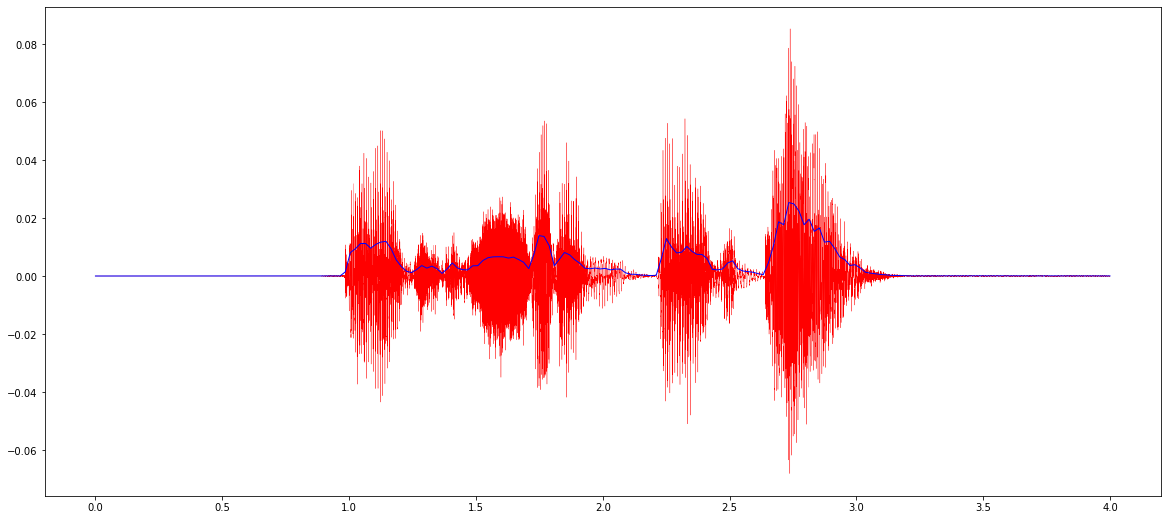

In [169]:
xcoords2=np.linspace(0,4,len(y))
ycoords=np.array(y)


plt.figure(figsize=(20,9))

plt.plot(xcoords1, x,
        linestyle = '-',
        linewidth = 0.3,
        color = 'red')


plt.plot(xcoords2, ycoords,
        linestyle = '-',
        linewidth = 1,
        color = 'blue')

plt.show()

Красный цвет - исходный сигнал, синий - полученная огибающая

### 2. Фильтрация (ФНЧ)

Реализован фильтр нижних частот. Если $Fd$ - частота дискретизации, $Fs$ - частота среза, $m$ - порядок фильтра, то вычисляем $$wn = 2\frac{Fs}{Fd}$$

ФНЧ:


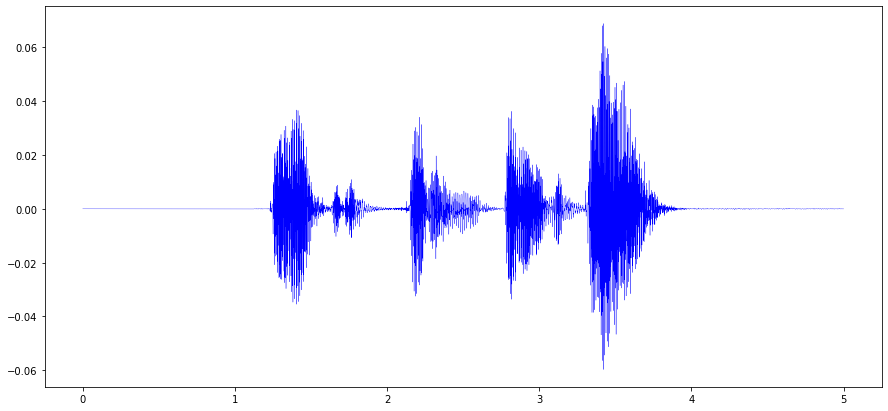

In [170]:
m=8
Fs=1000#частота среза
Fd=sr#частота дискретизации
wn=(2*Fs/Fd) #wn - относительная частота среза

b,a = signal.butter(m,wn,'lowpass')
filtedData=signal.filtfilt(b,a,x)

print("ФНЧ:")

xcoords = np.linspace(0,5,len(x))
plt.figure(figsize=(15,7))

plt.plot(xcoords, filtedData,
        linestyle = '-',
        linewidth = 0.3,
        color = 'blue')
plt.show()


ipd.Audio(filtedData,rate=sr)

### 3. Амплитудный детектор сигнал/шум

Сначала определяется среднее сигнала по амплитуде (без учета знака):
$$mid = \frac{1}{N} \displaystyle\sum_{k=0}^{N-1} |x(k)|$$
Затем зададется порог детектора $$Th = \alpha*mid$$
где $0 < \alpha < 1$ - подбирается экспериментально.
Задается величина провала в отсчетах - $k$. 
$y(i)$ - сигнал после детектирования.

**Событие "начало сигнала"**. Если $|x(i)|$ в течении $k$ отсчетов превышает порог, $y(i) = x(i)$

**Событие "окончание сигнала"**.Если $|x(i)|$ в течении $k$ отсчетов меньше порога, $y(i) = 0$ 

In [171]:
def getSignal(alpha,k):#k-величина "проавала" в отсчетах
    abs_x= [abs(i) for i in x]
    mid = sum(abs_x)/N #среднее сигнала по амплитуде
    Th = alpha*mid #порог детектора
    y=[] #сигнал после детектирования
    count_start=0
    count_end=0
    start=False #событие начало сигнала
    for i in x:
        if(abs(i)>Th):
            count_end=0
            count_start=count_start+1
            if(count_start>k):
                start=True
        else:
            count_start=0
            count_end=count_end+1
            if(count_end>k):
                start=False
        if(start):
            y.append(i)
        else:
            y.append(0)
    return y


Ниже приведены обработанные детектором сигналы с различиными параметрами $\alpha$ и $k$:

Эффект детектирования:
alpha =  0.1 , k =  10


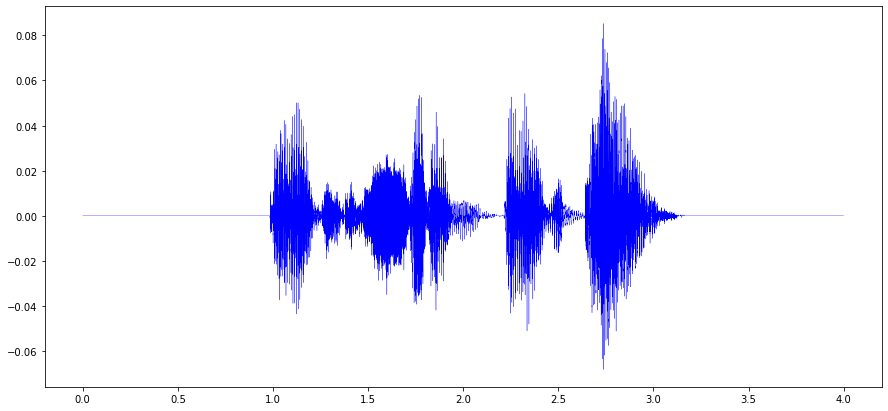

In [172]:
xcoords = np.linspace(0,4,len(x))
plt.figure(figsize=(15,7))

plt.plot(xcoords, getSignal(0.1,10),
        linestyle = '-',
        linewidth = 0.3,
        color = 'blue')
print('Эффект детектирования:')
print('alpha = ',0.1,', k = ',10)
plt.show()
ipd.Audio(getSignal(0.1,10),rate=sr)

Эффект детектирования:
alpha =  0.7 , k =  10


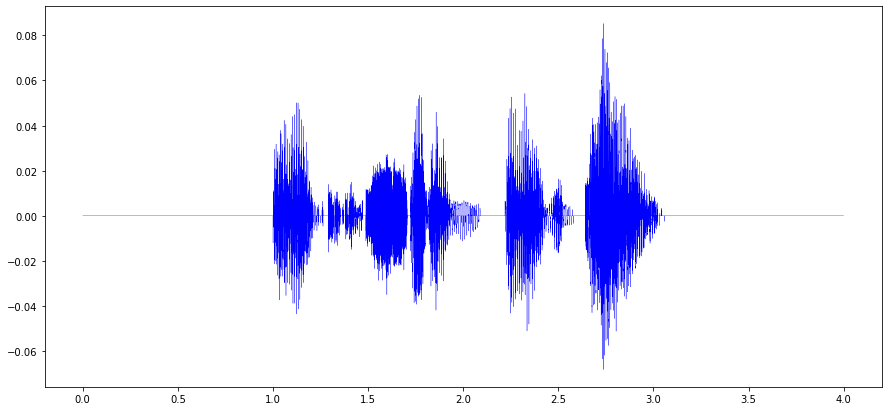

In [173]:
xcoords = np.linspace(0,4,len(x))
plt.figure(figsize=(15,7))

plt.plot(xcoords, getSignal(0.7,10),
        linestyle = '-',
        linewidth = 0.3,
        color = 'blue')
print('Эффект детектирования:')
print('alpha = ',0.7,', k = ',10)
plt.show()
ipd.Audio(getSignal(0.7,10),rate=sr)

Эффект детектирования:
alpha =  0.2 , k =  40


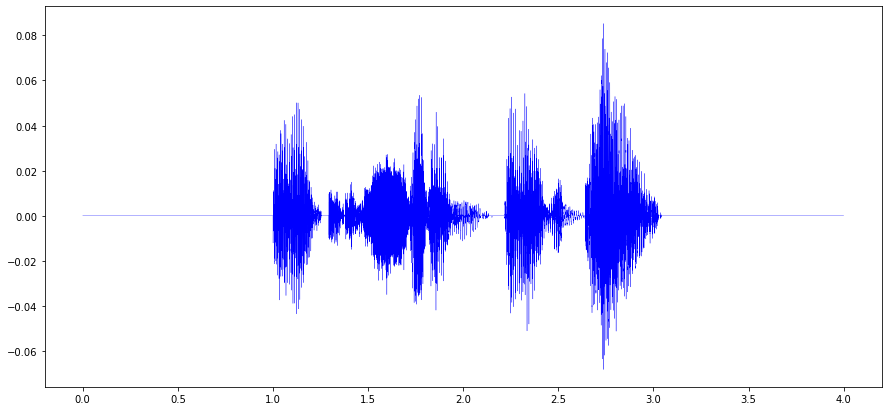

In [174]:
xcoords = np.linspace(0,4,len(x))
plt.figure(figsize=(15,7))

plt.plot(xcoords, getSignal(0.2,40),
        linestyle = '-',
        linewidth = 0.3,
        color = 'blue')
print('Эффект детектирования:')
print('alpha = ',0.2,', k = ',40)
plt.show()
ipd.Audio(getSignal(0.2,40),rate=sr)

Эффект детектирования:
alpha =  0.3 , k =  40


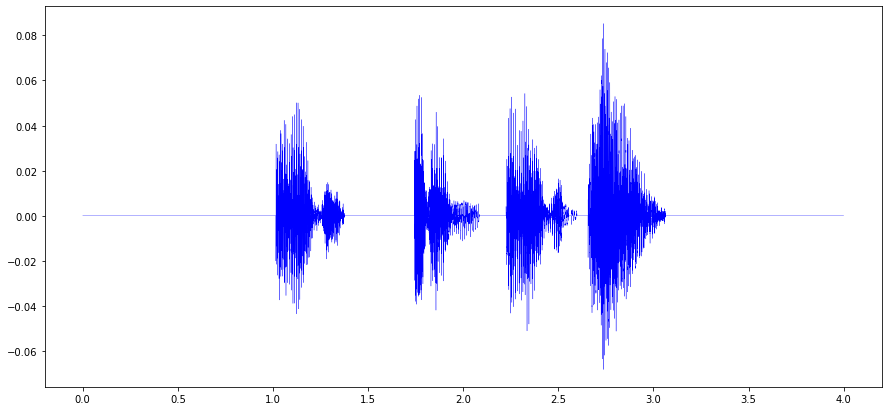

In [175]:
xcoords = np.linspace(0,4,len(x))
plt.figure(figsize=(15,7))

plt.plot(xcoords, getSignal(0.3,90),
        linestyle = '-',
        linewidth = 0.3,
        color = 'blue')
print('Эффект детектирования:')
print('alpha = ',0.3,', k = ',40)
plt.show()
ipd.Audio(getSignal(0.3,90),rate=sr)

### 4. Эхо (простейший ревербератор)

Ревербератор реализован, как набор линий задержки. Число линий задержки $N_L \geq 8$.
Каждая линия задержки имеет свой весовой коэффициент (задается пользователем):$$\alpha_1 > \alpha_2 > ... >\alpha_{N_L}$$

Перед добавлением к исходному сигналу, выход ревербератора фильтруется ФНЧ-фильтром первого порядка.

Желаемое соотношение между "сухим" и обработанным сигналом задается коэффициентом применимости $\gamma$

Используется ручной режим ревербератора. Для ручного режима задается максмальная задержка $D_1$, а величины остальных определяются автоматически через нее:
$$D_i = D_1*2^{\frac{1-i}{N_L}}, i=2,...,N_L$$.


In [176]:
NL = 12 #число линий задержки
alpha_array = [0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.1,0.09,0.06,0.03,0.01]#alpha_i
gamma=0.4

D_array = [] #D_i
D_array.append(4000) #D1 
for i in range(NL-1):
    D_array.append(D_array[0]*2**((-i)/NL)) #считаем Di

sounds=[]
for i in range(NL):
    new = alpha_array[i]*x;
    sounds.append(new)

m=1
Fs=3400#частота среза
Fd=sr#частота дискретизации
wn=(2*Fs/Fd) #wn - относительная частота среза
b,a = signal.butter(m,wn,'lowpass')

for i in range(NL):#фильтруем ФНЧ, умножаем на коэф гамма
    sounds[i] = signal.filtfilt(b,a,sounds[i])
    sounds[i]*=gamma

echo=np.zeros(len(x)+int(sum(D_array)))

for i in range(len(x)):#записываем начальный сигнал
    echo[i]=x[i] 

for i in range(1,NL):
    D_array[i]+=D_array[i-1]

for i in range(NL):
    for j in range(len(sounds[i])):
        echo[j+int(D_array[i])] += sounds[i][j]

    

    


Эффект эхо:


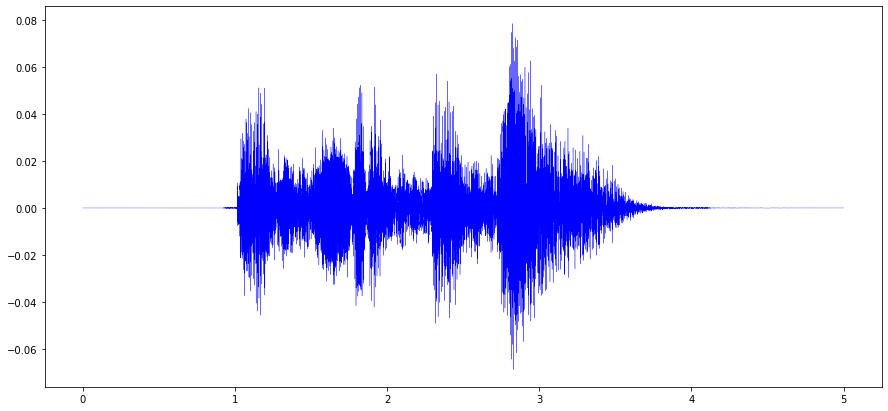

In [177]:
print("Эффект эхо:")

xcoords = np.linspace(0,5,len(echo))

plt.figure(figsize=(15,7))

plt.plot(xcoords, echo,
        linestyle = '-',
        linewidth = 0.3,
        color = 'blue',
        label = 'echo')
plt.show()

ipd.Audio(echo,rate=sr)

### 5. Классический Distortion
Обозначим входной сигнал и выходной сигнал, соответственно как
$x(i)$ и $y(i) i=0,1,...,N-1$. Пользователь задает порог - $Th$ и максимальное значение сигнала $Max > Th$. Тогда 
$$Y(i) = 
  \begin{cases}
    x(i),       & \quad |x(i)| \leq Th,\\
    Max*sign(x(i)), & \quad  |x(i)| > Th.
  \end{cases}
 $$

In [178]:
Th=0.01 #порог
Max= 0.5 #максимальное значение сигнала

y=[]

for i in x:
    if(abs(i)<=Th):
        y.append(i)
    else:
        y.append(Max*i/abs(i))



distortion:


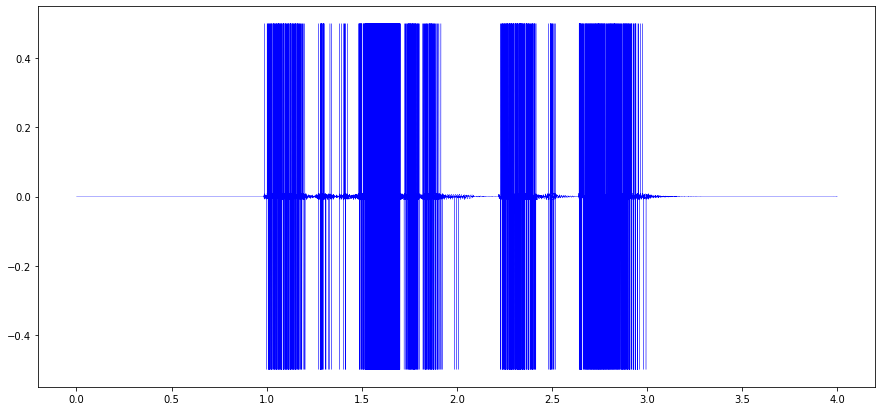

In [179]:
print('distortion:')

xcoords = np.linspace(0,4,len(x))

plt.figure(figsize=(15,7))

plt.plot(xcoords, y,
        linestyle = '-',
        linewidth = 0.3,
        color = 'blue')
plt.show()

ipd.Audio(y,rate=sr)

## Вывод
В ходе выполнения лабораторной работы были изучены возможности библиотек Python для решения задач цифровой обработки сигналов